### Laboratorio #7

- Roberto Vallecillos
- Alejandro Gomez
- Paola Contreras

In [3]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
# Lectura archivo

BankCSV = pd.read_csv('bank_transactions.csv')

In [5]:
# Mostrar datos del archivo

BankCSV.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
# Droppear datos nulos
BankCSV.dropna(inplace=True)

# Droppear columnas que no se usaran
BankCSV.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate"], axis=1)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,143207,25.0
1,M,JHAJJAR,2270.69,141858,27999.0
2,F,MUMBAI,17874.44,142712,459.0
3,F,MUMBAI,866503.21,142714,2060.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5
...,...,...,...,...,...
1048562,M,NEW DELHI,7635.19,184824,799.0
1048563,M,NASHIK,27311.42,183734,460.0
1048564,M,HYDERABAD,221757.06,183313,770.0
1048565,M,VISAKHAPATNAM,10117.87,184706,1000.0


In [6]:
# Describir datos
BankCSV.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


<Axes: >

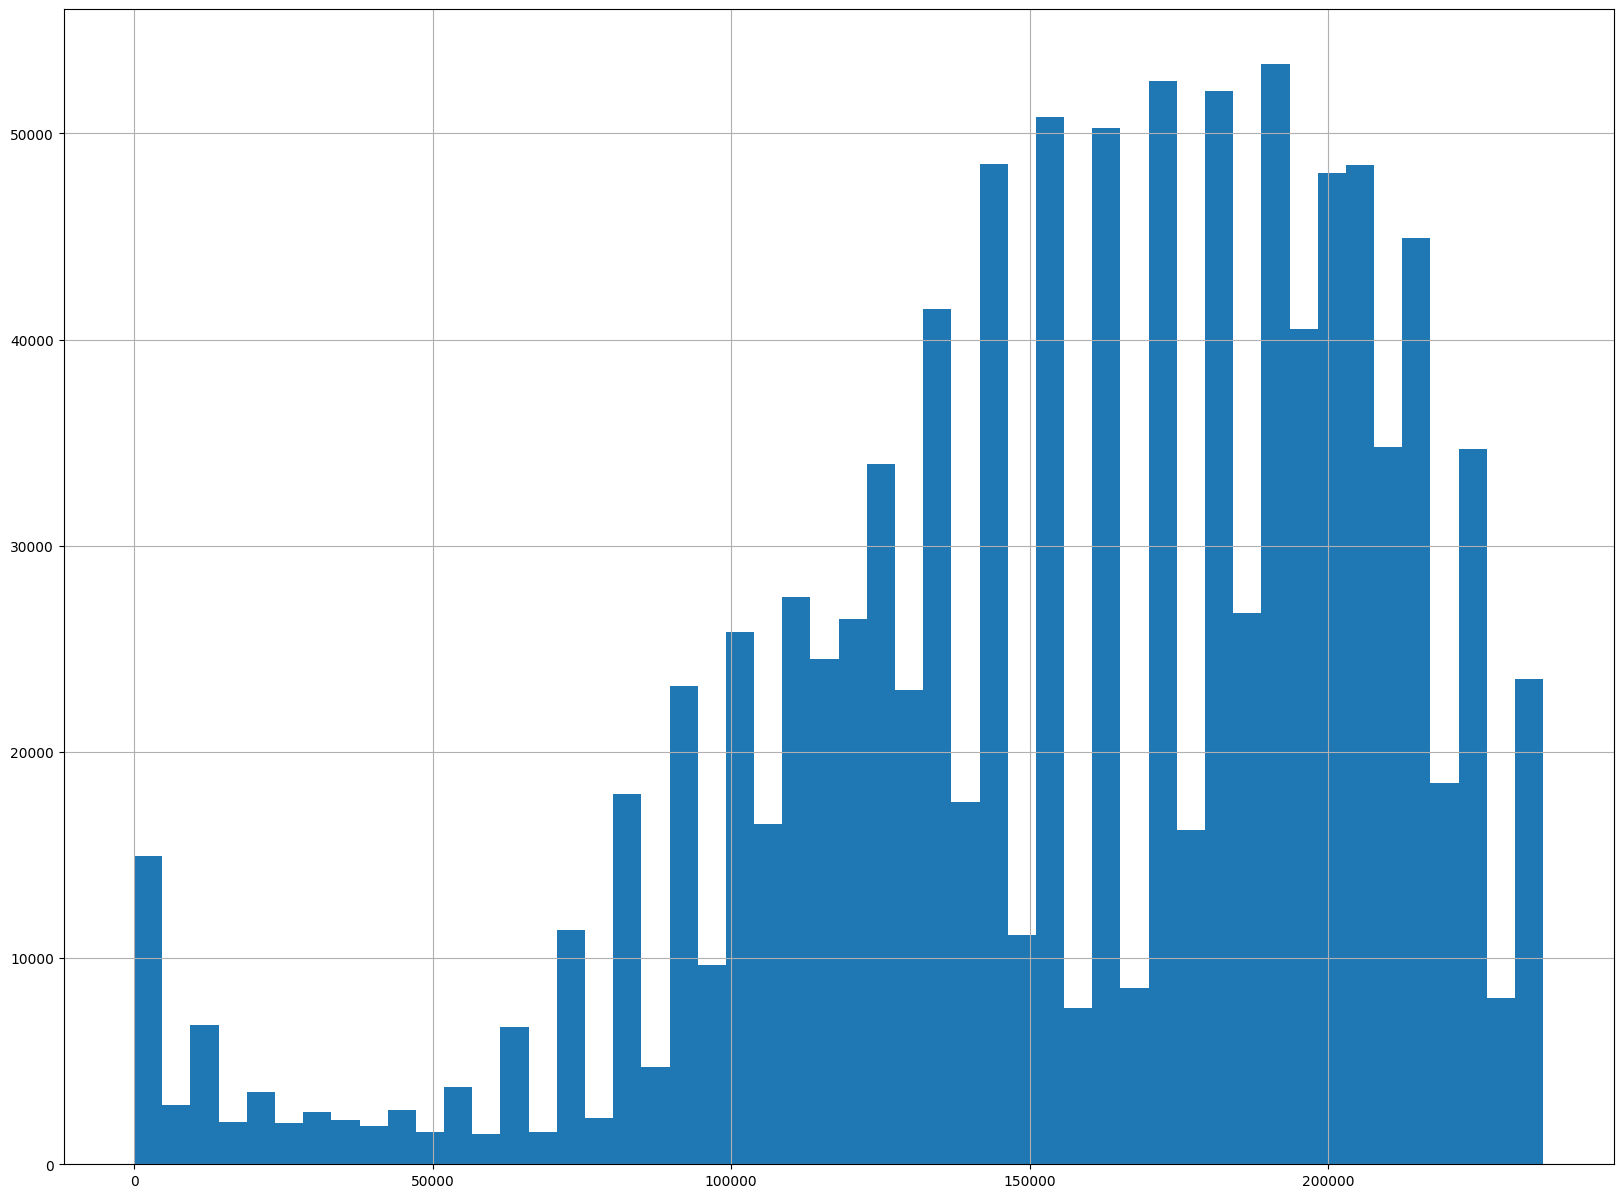

In [7]:
# Graficos exploratorios

BankCSV["TransactionTime"].hist(bins=50, figsize=(20,15))

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_24580\2795689042.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = BankCSV.corr()


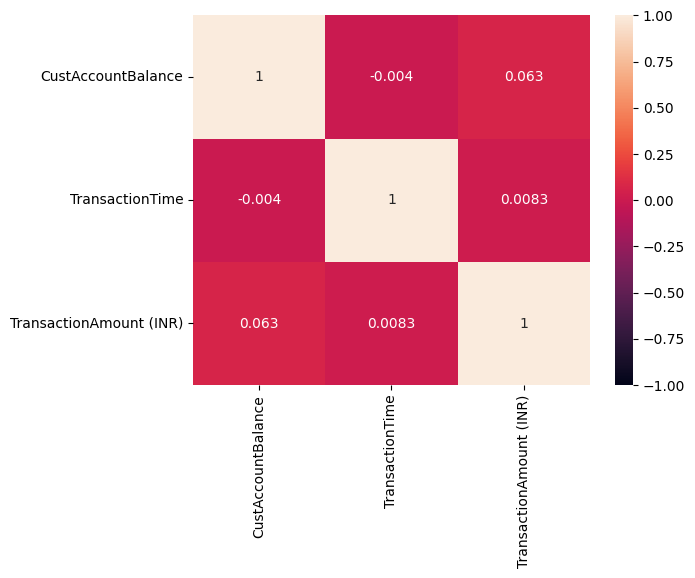

In [8]:
# Grafico de correlacion

corr_matrix = BankCSV.corr()

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

M    760978
F    280635
T         1
Name: CustGender, dtype: int64


<Axes: xlabel='CustGender', ylabel='count'>

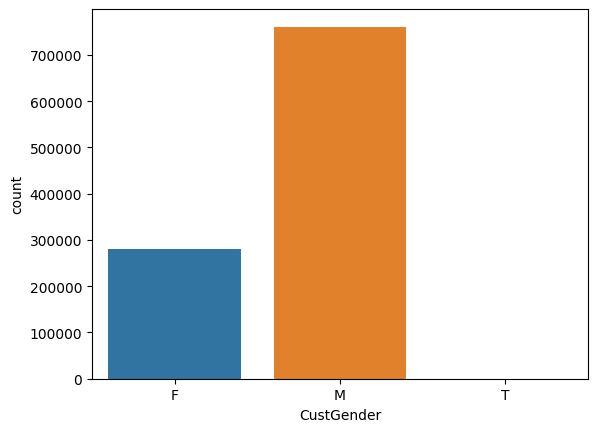

In [9]:
# Grafico exploratorio
print(BankCSV["CustGender"].value_counts())

sns.countplot(x="CustGender", data=BankCSV)

<Axes: xlabel='TransactionTime', ylabel='TransactionAmount (INR)'>

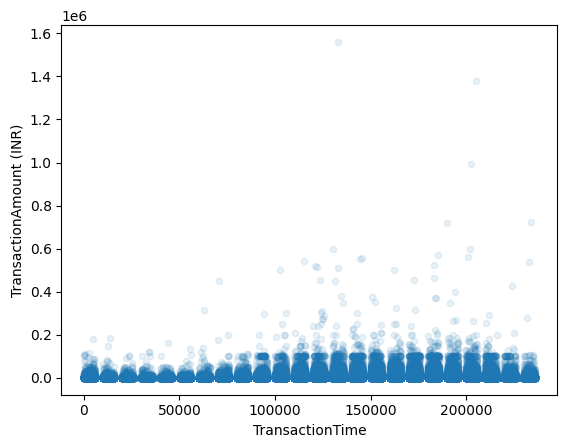

In [10]:
# Grafico exploratorio

BankCSV.plot(kind="scatter", x="TransactionTime", y="TransactionAmount (INR)" , alpha=0.1)

In [11]:
X = BankCSV[["CustAccountBalance", "TransactionAmount (INR)"]]

<Axes: xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

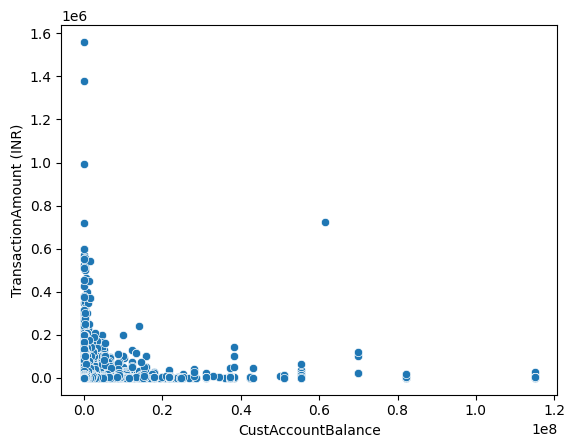

In [12]:
sns.scatterplot(x="CustAccountBalance", y="TransactionAmount (INR)", data=X)

In [13]:
# Label encoder para genero
LabelEncoder = LabelEncoder()
BankCSV['CustGender'] = LabelEncoder.fit_transform(BankCSV['CustGender'])

In [14]:
import random
def DistanciaEuclediana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))



In [15]:
class KMeans:
    def __init__(self,k, iter = 10):
        self.k = k
        self.iter = iter

    def train(self,X, TOL = 1e-3):
        #Creación de centroides
        centroides = np.random.rand(self.k,X.shape[1])
        centroidescopy = centroides.copy()

        #Iteraciones
        for _ in range(self.iter):
            #Distancia Euclidanía
            distance = np.linalg.norm(X - centroides[0,:],axis=1).reshape(-1,1)
            for clase in range(1,self.k):
                #Uso de sitancia euclidiana para cada punto son sus centoirdes y su su mejor clase
                distance = np.append(distance,np.linalg.norm(X - centroides[clase,:],axis=1).reshape(-1,1),axis=1)
            #División de clases
            classes = np.argmin(distance,axis=1) 
            # update position
            for clase in set(classes):
                centroides[clase,:] = np.mean(X[classes == clase,:],axis=0)
            #En el caso que los centroides convergen
            if np.linalg.norm(centroides - centroidescopy) < TOL:
                print('Centroid converged')
                break
                
        #Devolución de centroides
        self.centroids = centroides
    
    def predict(self,X):
        #Predicción
        distance = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for clase in range(1,self.k):
            distance = np.append(distance,np.linalg.norm(X - self.centroids[clase,:],axis=1).reshape(-1,1),axis=1)
        #Clasificación basado en la informaión dada
        classes = np.argmin(distance,axis=1)
        return classes
        




In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X= StandardScaler().fit_transform(X)
kmeans = KMeans(7)
kmeans.train(X)

classes = kmeans.predict(X)
classes


array([4, 2, 4, ..., 4, 4, 4], dtype=int64)

(-2.0, 50.0)

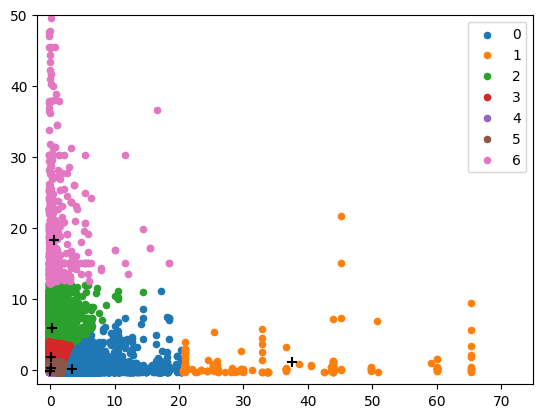

In [18]:
# DESCOMENTAR CUANDO SE HAYA CORRIDO FUNCION

u_labels = list(np.unique(classes))
for i in u_labels:
    plt.scatter(X[classes == i, 0], X[classes == i, 1], s = 20, label = i)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
plt.legend()
plt.xlim(-2, 75)
plt.ylim(-2, 50)


Librerias 

In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(BankCSV[['CustAccountBalance','TransactionAmount (INR)']])
df_scale = pd.DataFrame(scale, columns = ['CustAccountBalance','TransactionAmount (INR)']);
df_scale.head(5)



,CustAccountBalance,TransactionAmount (INR)
0,0.000155,0.000016
1,0.000020,0.017948
2,0.000155,0.000294
3,0.007532,0.001320
4,0.000058,0.001130


In [8]:
km=KMeans(n_clusters=7)
y_predicted = km.fit_predict(BankCSV[['CustAccountBalance','TransactionAmount (INR)']])
y_predicted

c:\Users\Contreras GP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [9]:
km.cluster_centers_

array([[3.95635432e+04, 1.43013260e+03],
       [3.91932760e+07, 1.31279995e+04],
       [6.28862832e+06, 5.85063056e+03],
       [1.62469242e+07, 7.04946121e+03],
       [2.30100157e+06, 4.99536423e+03],
       [9.06727345e+07, 1.23028097e+04],
       [6.57179854e+05, 3.32639364e+03]])

<Axes: xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

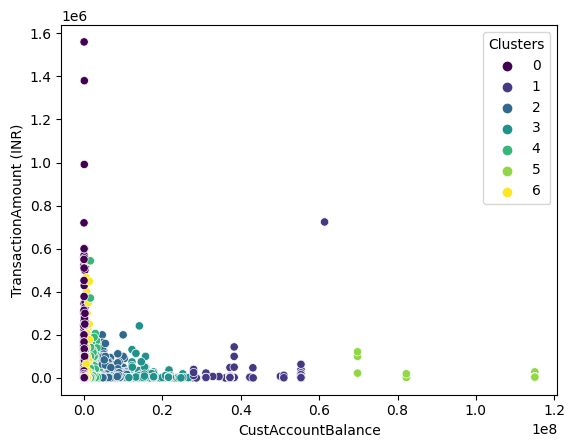

In [10]:
BankCSV['Clusters'] = km.labels_
sns.scatterplot(x="CustAccountBalance", y="TransactionAmount (INR)",hue = 'Clusters',  data=BankCSV,palette='viridis')